In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
#Loading the dataset for red wine and creating two new columns winetype and quality
red_wine = pd.read_csv("C:\\Users\\anich\\Downloads\\winequality-red.csv", sep = ';')
red_wine['winetype']='red'
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [3]:
#Loading the dataset for white wine and creating two new columns winetype and quality
white_wine = pd.read_csv("C:\\Users\\anich\\Downloads\\winequality-white.csv", sep = ';')
white_wine['winetype']='white'
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium


In [95]:
#Merging the two datasets
wine = pd.concat([red_wine,white_wine])
wine = wine.sample(frac=1, random_state=42).reset_index(drop=True) #To shuffle the dataset

In [96]:
#To view the top 5 rows
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [8]:
#Statistical summary of the dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
#To know the number of rows and columns
wine.shape

(6497, 14)

In [10]:
#To know the column names
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'winetype', 'quality_label'],
      dtype='object')

In [11]:
#To know datatype of the attributes
wine.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
winetype                  object
quality_label           category
dtype: object

In [12]:
#To check for null values
wine.isnull().values.any()

False

In [13]:
#To get various information on the data
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
winetype                6497 non-null object
quality_label           6497 non-null category
dtypes: category(1), float64(11), int64(1), object(1)
memory usage: 666.4+ KB


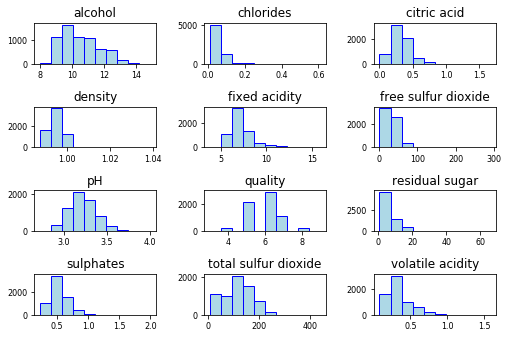

In [48]:
#Plotting histogram
wine.hist(bins=10, color='lightblue', edgecolor='blue', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

Text(0.5, 0.98, 'Wine type based on quality of wine')

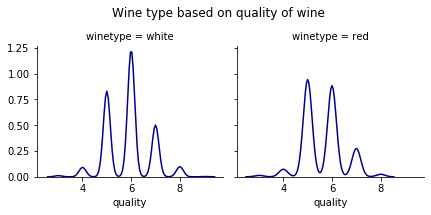

In [51]:
#Plotting facet grid
g = sns.FacetGrid(wine, col='winetype')
g = g.map(sns.kdeplot, 'quality', color = 'darkblue')
plt.subplots_adjust(top= 0.8)
g.fig.suptitle('Wine type based on quality of wine')

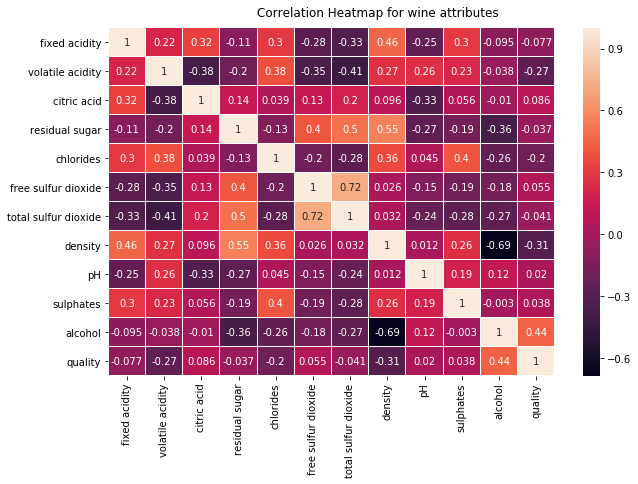

In [41]:
#Plotting heatmap
f, ax = plt.subplots(figsize=(10, 6))
b = sns.heatmap(wine.corr(), annot=True, linewidths=.05, ax=ax)
f.subplots_adjust(top=0.93)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
title= f.suptitle('Correlation Heatmap for wine attributes', fontsize=12)

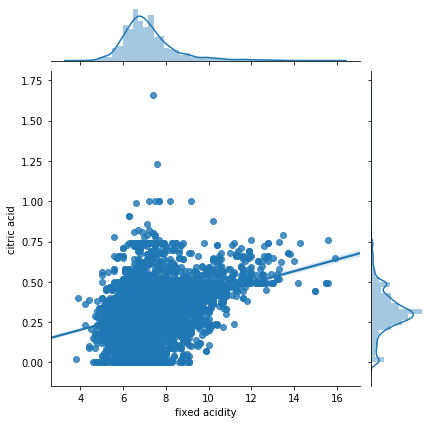

In [97]:
#Joint plot
a = sns.jointplot("fixed acidity", "citric acid", data = wine, kind = 'reg', color = None)

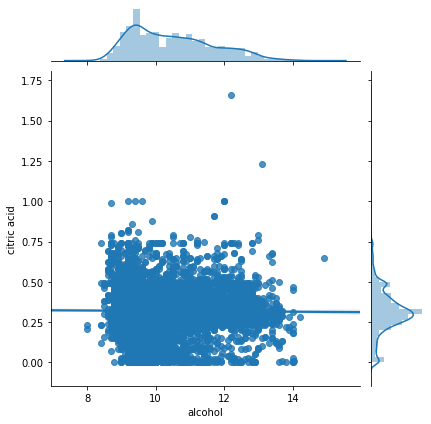

In [56]:
a = sns.jointplot("alcohol", "citric acid", data = wine, kind = 'reg')

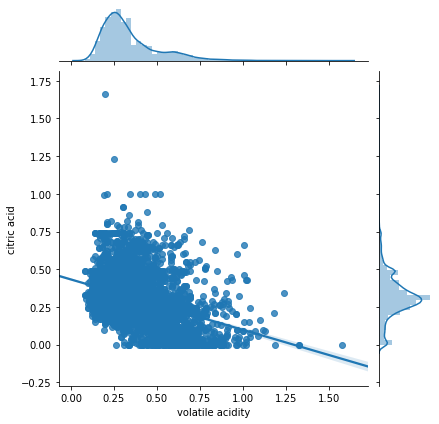

In [88]:
a = sns.jointplot("volatile acidity", "citric acid", data = wine, kind = 'reg')

Text(0.5, 1.0, 'Countplot of Winetype')

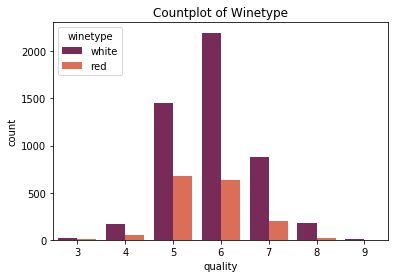

In [90]:
#Countplot
sns.countplot(x="quality", hue="winetype", data=wine, palette="rocket")
plt.title('Countplot of Winetype')

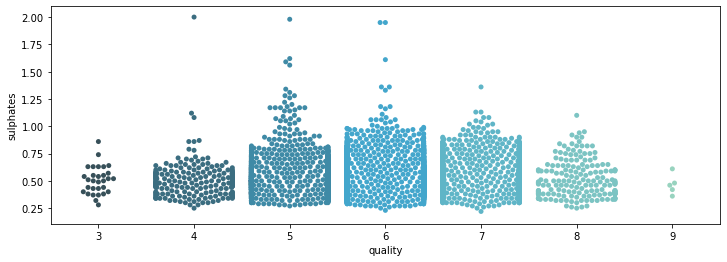

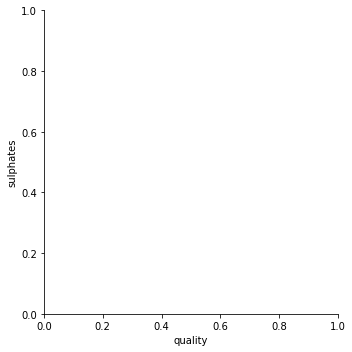

In [94]:
#Swarm plot
f,ax = plt.subplots(figsize=(12, 4))
p = sns.catplot(x="quality", y="sulphates", kind = 'swarm', data= wine, palette= 'GnBu_d', ax=ax)


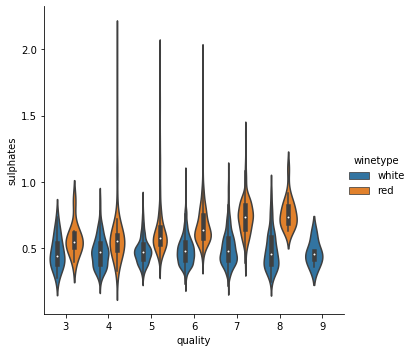

In [92]:
#Violin plot
g = sns.catplot(x="quality", y="sulphates", hue="winetype",
               data=wine, kind="violin")

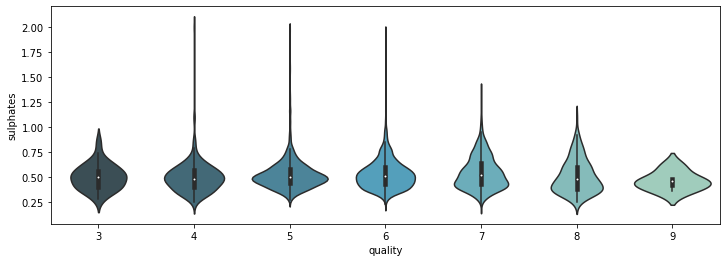

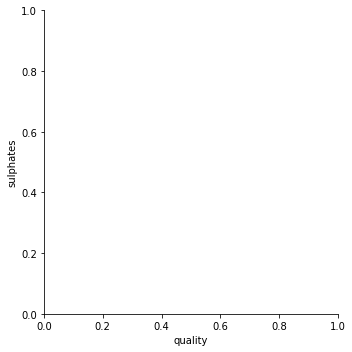

In [23]:
#Violin plot
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
b = sns.catplot(x="quality", y="sulphates", kind = 'violin', data= wine, palette= 'GnBu_d', ax = ax)

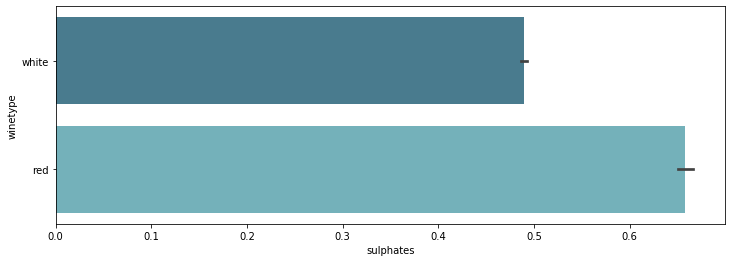

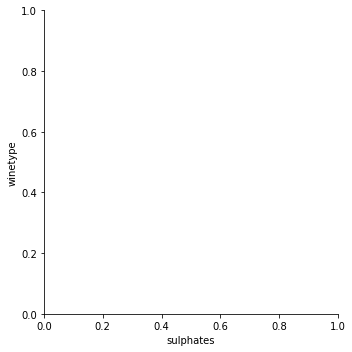

In [24]:
#Bar plot
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
p = sns.catplot(x="sulphates", y="winetype", kind = 'bar', data= wine, palette= 'GnBu_d', ax=ax)